Your friend suspects that movies are getting shorter and they've found some initial evidence of this. Having peaked your interest, you will perform exploratory data analysis on the netflix_data.csv data to understand what may be contributing to movies getting shorter over time. Your analysis will follow these steps:

Load the CSV file and store as netflix_df.
Filter the data to remove TV shows and store as netflix_subset.
Investigate and subset the Netflix movie data, keeping only the columns "title", "country", "genre", "release_year", "duration", and saving this into a new DataFrame called netflix_movies.
Filter netflix_movies to find the movies that are strictly shorter than 60 minutes, saving the resulting DataFrame as short_movies; inspect the result to find possible contributing factors.
Using a for loop and if/elif statements, iterate through the rows of netflix_movies and assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else). Save the results in a colors list. Initialize a matplotlib figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release".
After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either "yes" or "no" to the variable answer.
Click the "Submit Project" button to check your solution.

In [2]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

import os

# Load the CSV file and store as netflix_df
netflix_df = pd.read_csv("netflix_data.csv")

# review data
print(netflix_df.head())


  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

In [4]:
# Filter the data to remove TV shows and store as netflix_subset.
netflix_subset = netflix_df[netflix_df["type"] == "Movie"]

print(netflix_subset.head())

  show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   
4      s5  Movie     21     Robert Luketic   
6      s7  Movie    122    Yasir Al Yasiri   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

          date_added  release_year  duration  \
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123   
6       June 1, 2020          2019        95   

       

In [13]:
# Investigate and subset the Netflix movie data, keeping only the columns "title", "country", "genre", "release_year", "duration", and saving this into a new DataFrame called netflix_movies.

netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]

print(netflix_movies.head())

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


In [12]:
# Filter netflix_movies to find the movies that are strictly shorter than 60 minutes, saving the resulting DataFrame as short_movies; inspect the result to find possible contributing factors.

short_movies = netflix_movies[netflix_movies["duration"] < 60]

print(short_movies.head())






Empty DataFrame
Columns: [release_year, duration, genre]
Index: []


Using a for loop and if/elif statements, iterate through the rows of netflix_movies and assign colors of your choice to four genre groups ("Children", "Documentaries", "Stand-Up", and "Other" for everything else). Save the results in a colors list. Initialize a matplotlib figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release".

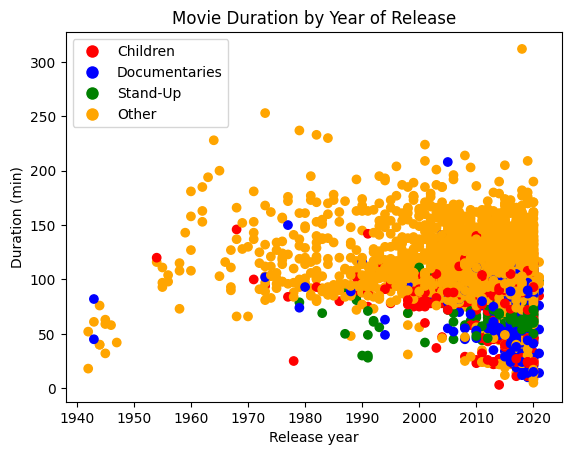

In [14]:
import matplotlib.pyplot as plt

# Create a colors list based on genre
colors = []
for index, row in netflix_movies.iterrows():
    if row["genre"] == "Children":
        colors.append("red")
    elif row["genre"] == "Documentaries":
        colors.append("blue")
    elif row["genre"] == "Stand-Up":
        colors.append("green")
    else:
        colors.append("orange")

# Initialize a matplotlib figure object called fig
fig, ax = plt.subplots()

# Create the scatter plot
scatter = ax.scatter(netflix_movies["release_year"], netflix_movies["duration"], c=colors)

# Set labels and title
ax.set_xlabel("Release year")
ax.set_ylabel("Duration (min)")
ax.set_title("Movie Duration by Year of Release")

# Add a legend manually
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Children'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Documentaries'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Stand-Up'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Other')
]
ax.legend(handles=handles)

# Show the plot
plt.show()


In [15]:
# After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either "yes" or "no" to the variable answer.

# Analyze the trend to determine if movies are getting shorter
# Compute the average duration for each year
average_duration_per_year = netflix_movies.groupby("release_year")["duration"].mean()

# Check if the average duration is decreasing over the years
is_getting_shorter = average_duration_per_year.is_monotonic_decreasing

# Assign the answer based on the trend analysis
answer = "yes" if is_getting_shorter else "no"

# Output the answer
print("Are we certain that movies are getting shorter?", answer)





Are we certain that movies are getting shorter? no
